In [61]:
from vega_datasets import data
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
df = data.sf_temps()
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


### Use the above dataset for the following exercises:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?

In [63]:
df['date'] = pd.to_datetime(df['date'])


df.set_index('date', inplace=True)

In [64]:
mean_temp = df.resample('D').mean()

In [65]:
mean_temp

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


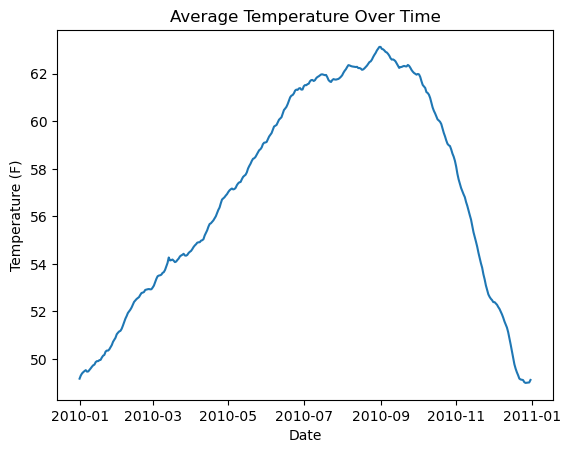

In [66]:
plt.plot(mean_temp)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.title('Average Temperature Over Time')
plt.show()


In [67]:
min_temp = df.resample('D').min()
min_temp.head()

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1


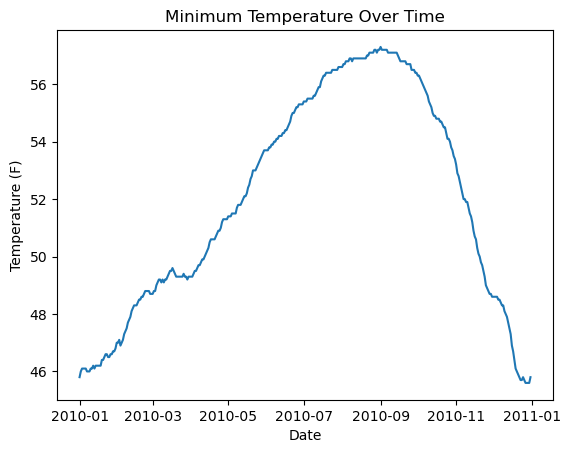

In [68]:
plt.plot(min_temp)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.title('Minimum Temperature Over Time')
plt.show()

In [69]:
max_temp = df.resample('D').max()
max_temp.head()

,temp
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8


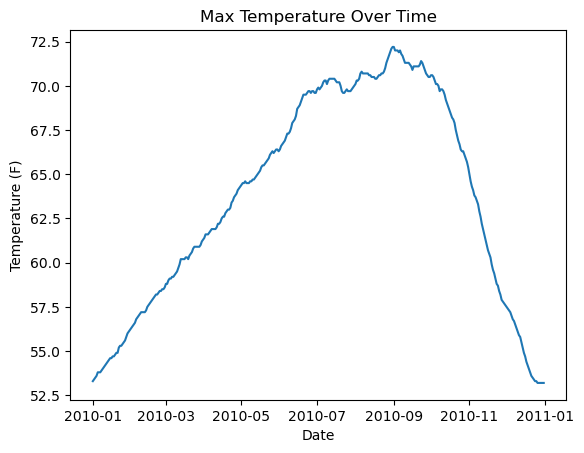

In [70]:
plt.plot(max_temp)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.title('Max Temperature Over Time')
plt.show()

In [71]:
df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [72]:
monthly_mean = df.resample('M').mean()

coldest_month = monthly_mean.idxmin()[0].strftime("%B")

print("The coldest month, on average, is:", coldest_month)

The coldest month, on average, is: January


In [73]:
hottest_month = monthly_mean.idxmax()[0].strftime("%B")

print("The month with the highest average temperature is:", hottest_month)

The month with the highest average temperature is: September


### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [74]:
daily_min_max = df.resample('D').agg(['min', 'max'])
daily_min_max

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]

In [75]:
daily_min_max['temp']['max']

date
2010-01-01    53.3
2010-01-02    53.4
2010-01-03    53.5
2010-01-04    53.6
2010-01-05    53.8
              ... 
2010-12-27    53.2
2010-12-28    53.2
2010-12-29    53.2
2010-12-30    53.2
2010-12-31    53.2
Freq: D, Name: max, Length: 365, dtype: float64

In [76]:
daily_temp_change = daily_min_max['temp']['max'] - daily_min_max['temp']['min']
daily_temp_change.head()

date
2010-01-01    7.5
2010-01-02    7.4
2010-01-03    7.4
2010-01-04    7.5
2010-01-05    7.7
Freq: D, dtype: float64

In [77]:
monthly_temp_change = daily_temp_change.resample('M').mean()
monthly_temp_change.head()

date
2010-01-31     8.341935
2010-02-28     9.485714
2010-03-31    10.854839
2010-04-30    12.320000
2010-05-31    12.909677
Freq: M, dtype: float64

In [78]:
month_with_highest_variability = monthly_temp_change.idxmax().strftime("%B")

print("The month with the highest daily temperature variability is:", month_with_highest_variability)

The month with the highest daily temperature variability is: September


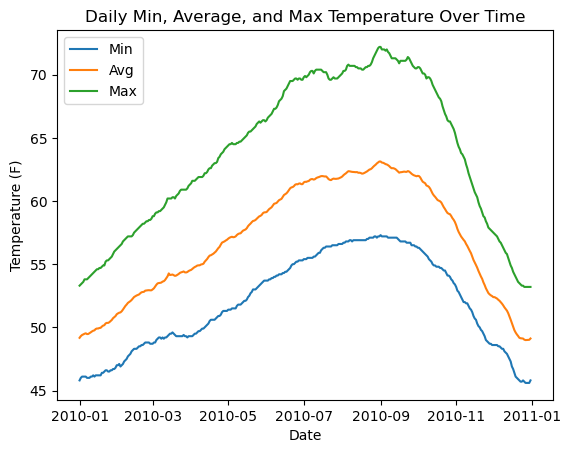

In [79]:
# Load the sf_temps dataset
df = data.sf_temps()

# Convert the date column to a datetime type
df['date'] = pd.to_datetime(df['date'])

# Set the date column as the index
df.set_index('date', inplace=True)

# Resample by day and calculate the min, average, and max temperature
daily_min_avg_max = df.resample('D').agg(['min', 'mean', 'max'])

# Plot the daily min, average, and max temperature over time
plt.plot(daily_min_avg_max)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.title('Daily Min, Average, and Max Temperature Over Time')
plt.legend(['Min', 'Avg', 'Max'], loc='upper left')
plt.show()


In [80]:
#new dataset
df = data.seattle_weather()
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


### Use the above dataset for the following exercises:

1. Which year and month combination has the highest amount of precipitation?
2. Visualize the amount of monthly precipitation over time.
3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [81]:
df['date'] = pd.to_datetime(df['date'])

In [82]:
df.set_index('date', inplace=True)

In [83]:
df

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


In [84]:
year_month_precip = df.resample('M').precipitation.sum()
max_precip_month = year_month_precip.idxmax().strftime('%Y-%m')
print("Year-Month with highest precipitation:", max_precip_month)

Year-Month with highest precipitation: 2015-12


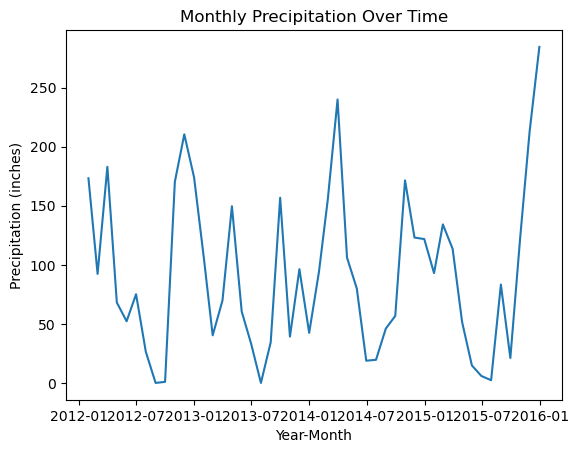

In [85]:
plt.plot(year_month_precip)
plt.xlabel('Year-Month')
plt.ylabel('Precipitation (inches)')
plt.title('Monthly Precipitation Over Time')
plt.show()

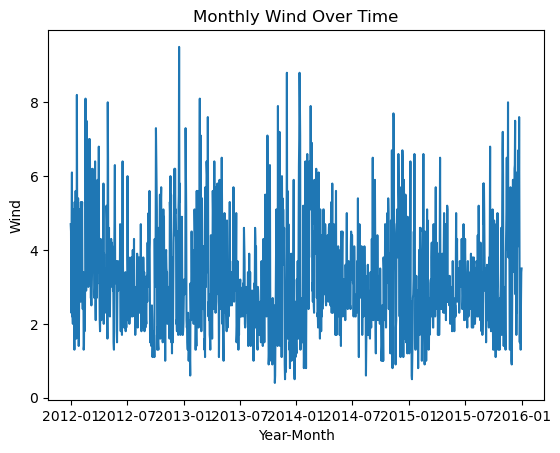

In [86]:
year_month_wind = df.resample('D').wind.sum()
plt.plot(year_month_wind)
plt.xlabel('Year-Month')
plt.ylabel('Wind')
plt.title('Monthly Wind Over Time')
plt.show()

In [87]:
max_wind_month = year_month_wind.idxmax().strftime('%Y-%m')
print("Year-Month with highest average wind:", max_wind_month)

Year-Month with highest average wind: 2012-12


In [88]:
df[df.weather == 'sun']

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-08,0.0,10.0,2.8,2.0,sun
2012-01-11,0.0,6.1,-1.1,5.1,sun
2012-01-12,0.0,6.1,-1.7,1.9,sun
2012-01-13,0.0,5.0,-2.8,1.3,sun
2012-02-02,0.0,8.3,1.7,2.6,sun
...,...,...,...,...,...
2015-12-13,1.3,7.8,6.1,6.1,sun
2015-12-14,0.0,7.8,1.7,1.7,sun
2015-12-26,0.0,4.4,0.0,2.5,sun


In [89]:
sun_days = df[df.weather == 'sun'].resample('D').count()
sunniest_year = sun_days.idxmax()[0].strftime('%Y')

print("Sunniest year:", sunniest_year)

Sunniest year: 2012


6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of precipitation?

In [90]:
df[df.precipitation > 0].resample('m').count().head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-31,22,22,22,22,22
2012-02-29,19,19,19,19,19
2012-03-31,22,22,22,22,22
2012-04-30,17,17,17,17,17
2012-05-31,10,10,10,10,10


In [91]:
monthly_rain = df[df.precipitation > 0].resample('M').count()
rainiest_month = monthly_rain.idxmax()[0].strftime('%B')

print("Month with the most rain:", rainiest_month)

Month with the most rain: December


In [92]:
monthly_rain = df[df.precipitation > 0].resample('M').count()
month_with_most_precip = monthly_rain.idxmax()[0].strftime('%B')
print("Month with the most days with non-zero precipitation:", month_with_most_precip)

Month with the most days with non-zero precipitation: December


In [93]:
df = data.flights_20k()

### Use the above dataset for the following exercises:

1. Convert any negative delays to 0.
2. Which hour of the day has the highest average delay?
3. Does the day of the week make a difference in the delay amount?
4. Does the month make a difference in the delay amount?

In [94]:
df

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [95]:
df['date'] = pd.to_datetime(df['date'])

In [96]:
df.set_index('date', inplace = True)

In [97]:
df['delay'] = df['delay'].clip(lower=0)
df

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK
2001-01-19 13:05:00,0,1489,SEA,MCI
2001-02-07 11:37:00,0,1848,MCO,PHX


In [98]:
hourly_delay = df.resample('H').delay.mean()
max_delay_hour = hourly_delay.idxmax().strftime('%H')
print("Hour with the highest average delay:", max_delay_hour)

Hour with the highest average delay: 03


In [ ]:
# Q2: Does the day of the week make a difference in the delay amount?
weekday_delay = df.resample('d').delay.mean()
weekday_delay

In [129]:
diff_weekday_delay = weekday_delay.max() - weekday_delay.min()
diff_weekday_delay

34.698136965180524

In [130]:
if diff_weekday_delay > 0:
    print(f'Yes, weekday makes a difference in delay amount by: {diff_weekday_delay:.2f} mins')
else:
    print('No')
    

Yes, weekday makes a difference in delay amount by: 34.70 mins


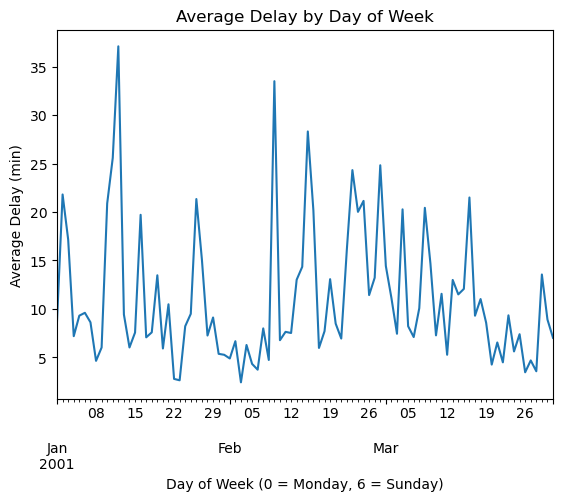

In [127]:
weekday_delay.plot(kind='line', xlabel='Day of Week (0 = Monday, 6 = Sunday)', ylabel='Average Delay (min)')
plt.title('Average Delay by Day of Week')
plt.show()

In [ ]:
monthly_delay = df.resample('M').delay.mean()

In [114]:
diff_month_delay = monthly_delay.max() - monthly_delay.min()
diff_month_delay

2.430818781785577

In [124]:
if diff_month_delay > 0:
    print(f'Yes, month makes a difference in delay amount by: {diff_month_delay:.2f} mins')
else:
    print('No')

Yes, month makes a difference in delay amount by: 2.43 mins


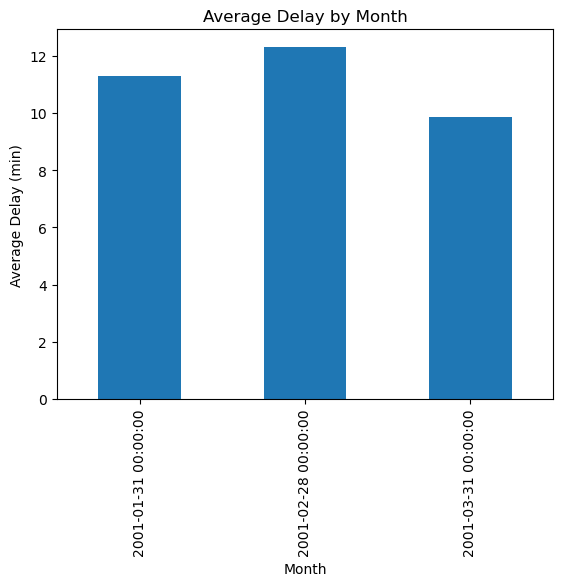

In [101]:
monthly_delay.plot(kind='bar', xlabel='Month', ylabel='Average Delay (min)')
plt.title('Average Delay by Month')
plt.show()